In [1]:
%matplotlib inline
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import time

# 休み明け！次回、Polynomial のライブラリ化！

# 呼び出し方

ridge = RidgeRegression(basis=phi, coef=0.0)

ridge = RidgeRegression(basis_type="poly", max_degree=3, coef=0.01)


ridge_fit=ridge(X,Y)

ridge_fit_predict=ridge_fit(X_0)

In [2]:
class MLmodel:
    
    def __init__(self):
        return
    
    def set_data(self,X_train=None,t_train=None):

        if type(X_train)!=type(None) :
            X_train_old=self.X_train if hasattr(self,'X_train') else None
            self.X_train=X_train
            self.num_data=self.X_train[0].size

        if type(t_train)!=type(None) :
            t_train_old=self.t_train if hasattr(self,'t_train') else None
            self.t_train=t_train
            self.t_train_array=np.reshape(t_train,np.size(t_train))
        
        if self.X_train[0].size!=t_train.size:
            self.X_train=X_train_old
            self.t_train=t_train_old

            assert  False ,"Numbers of data of X and t must be the same."

        return
    
    def fit(self, X_train=None, t_train=None):

        if type(X_train)!=type(None) or type(t)!=type(None) :
            self.set_data(X_train,t_train)
        return
    
    def predict(self, X_test):
        self.X_test=X_test
        self.t_test=None
        
        return
    
    def plot(self,training_data=True,test_data=False):
                
        fig = plt.figure()
        ax = Axes3D(fig)
        
        if training_data:
            ax.plot_wireframe(self.X_train[0],self.X_train[1],self.t_train) #<---ここでplot
            ax.scatter(self.X_train[0],self.X_train[1],self.t_train) #<---ここでplot

        if test_data:
            
            assert type(self.X_test)!=type(None), "X_test none"
            assert type(self.t_test)!=type(None), "t_test none"

            
            ax.scatter(self.X_test[0],self.X_test[1],self.t_test,color='green') #<---ここでplot
            ax.plot_wireframe(self.X_test[0],self.X_test[1],self.t_test,color='green') #<---ここでplot

        return

In [3]:
class RidgeRegression(MLmodel):
    
    def __init__(self, basis=None, regular_coef=0.0):
        self.basis = basis
        self.regular_coef = regular_coef
        self.num_func = len(basis)
    
    def fit(self, X_train=None, t_train=None):
        MLmodel.fit(self,X_train,t_train)
        PHI = np.zeros((self.num_data, self.num_func))

        #関数Φ（行：サンプル数,列：基底関数の個数）の各要素に値を入れる
        for i,ph in enumerate(self.basis):
            PHI[:,i] = np.reshape(ph(self.X_train[0],self.X_train[1]),self.num_data)
        
        PHI_trans=np.transpose(PHI)
        
        identity=np.identity(len(PHI_trans.dot(PHI)))
        self.w = np.linalg.inv(PHI_trans.dot(PHI)+self.regular_coef*identity).dot(np.dot(PHI_trans, self.t_train_array))
        
        return
    
    def predict(self, X_test):
        MLmodel.predict(self,X_test)
        PHI = np.zeros((self.num_data, self.num_func))

        #関数Φ（行：サンプル数,列：基底関数の個数）の各要素に値を入れる
        for i,ph in enumerate(self.basis):
            PHI[:,i] = np.reshape(ph(self.X_test[0],self.X_test[1]),self.num_data)

            self.t_test_array=PHI.dot(self.w)
            self.t_test=self.t_test_array.reshape(self.X_test[0].shape)

        return        

In [4]:
class PolynomialRegression(RidgeRegression):
    
    def get_polynomial_basis(self, max_degree):
        polynomials=[]
        for deg in range(0,max_degree+1):
            deg_polys=self.get_polynomials_of_a_degree(deg)
            for poly in deg_polys:
                polynomials.append(poly)
        return polynomials
    
    def __init__(self, max_degree=1,regular_coef=0.0):
        polynomial_basis=self.get_polynomial_basis(max_degree)
        
        RidgeRegression.__init__(self,polynomial_basis,regular_coef)
        return  
    
    def get_polynomials_of_a_degree(self, deg):
        polynomials=[]
        for k in range(0,deg+1):
            ph=self.make_a_polynomial(deg-k,k)
            polynomials.append(ph)
        return polynomials

    def make_a_polynomial(self, a,b):
    #     def phi (x,y):
    #         return x**a*y**b;
    #     return phi
        return lambda x,y: x**a*y**b

In [5]:
xy_min = -1
xy_max = 1
n_division = 10#100#10

x = np.linspace(xy_min, xy_max, n_division+1)

#Ｘは(n_division+1)^2個の点の集まり。
#X[0]はx座標の集まり. X[1]はy座標の集まり。
X=np.meshgrid(x,x)
t=np.sin(X[0])+3*np.cos(X[1])+X[0]*X[1]+np.sin(X[1])**2 *np.cos(X[0])*X[1]**(5)
#t=X[0]**6*X[1]**3

target=t

In [6]:
#ノイズのあるデータの生成

#正規分布にしたがうランダムノイズを生成する。最小二乗法の前提：誤差は正規分布
standard_deviation =0.3;0.05; .1 #0.8 #0.1
mean = .0
normal_random_generator = np.random.normal

tuple_data_shape=X[0].shape
t_noised=t+ normal_random_generator(mean, standard_deviation,tuple_data_shape)

target=t_noised

In [7]:
# 関数を適当に与えるやりかた
phi_00 =lambda a,b : np.ones(a.shape)
phi_10 =lambda a,b : a
phi_01 =lambda a,b : b
phi_20 =lambda a,b : a**2
phi_11 =lambda a,b : a*b
phi_02 =lambda a,b : b**2
phi_05 =lambda a,b : b**5
phi_sin_x= lambda a,b: np.sin(a)
phi_sin_y= lambda a,b: np.sin(b)
phi_cos_x= lambda a,b: np.cos(a)
phi_cos_y= lambda a,b: np.cos(b)
phi_05_sin_y2_cos_x = lambda a,b:b**5* np.sin(a)**2 *np.cos(b)

phi = [phi_00, phi_10,phi_01,phi_20,phi_11,phi_02]

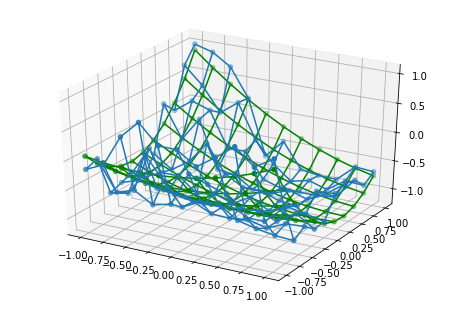

In [8]:
rg=RidgeRegression(phi)
rg.set_data(X,target)
rg.set_data(t_train=target)
rg.fit(t_train=np.cos(target))
rg.predict(X)
rg.plot(training_data=True,test_data=True)

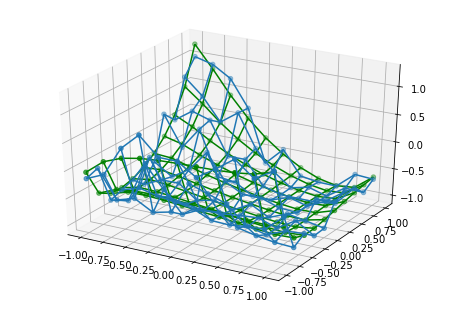

In [9]:
pr = PolynomialRegression(10,3)
pr.set_data(X,target)
pr.set_data(t_train=target)
pr.fit(t_train=np.cos(target))
pr.predict(X)
pr.plot(training_data=True,test_data=True)

# RigdgeRegressionとかを使う。

In [10]:
# 関数を適当に与えるやりかた
phi_00 =lambda a,b : np.ones(a.shape)
phi_10 =lambda a,b : a
phi_01 =lambda a,b : b
phi_20 =lambda a,b : a**2
phi_11 =lambda a,b : a*b
phi_02 =lambda a,b : b**2
phi_05 =lambda a,b : b**5
phi_sin_x= lambda a,b: np.sin(a)
phi_sin_y= lambda a,b: np.sin(b)
phi_cos_x= lambda a,b: np.cos(a)
phi_cos_y= lambda a,b: np.cos(b)
phi_05_sin_y2_cos_x = lambda a,b:b**5* np.sin(a)**2 *np.cos(b)

phi = [phi_00, phi_10,phi_01,phi_20,phi_11,phi_02]
ridge_model1=RidgeRegression(phi,regular_coef=1.0)

#多項式でやるやり方
polynomial_ridge=PolynomialRegression(max_degree=3,regular_coef=0.0)

In [11]:
test =  

SyntaxError: invalid syntax (<ipython-input-11-86bae64ce731>, line 1)

# 今までの

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

X = [[0.44, 0.68], [0.99, 0.23]]
vector = [109.85, 155.72]
predict= [0.49, 0.18]

poly = PolynomialFeatures(degree=2)
X_ = poly.fit_transform(X)
predict_ = poly.fit_transform(predict)

In [ ]:
, basis=None, coef=None, basis_type=None, max_degree=None

In [ ]:
func1(3)

# やること

# 関数作成
## データセット(X,t)を作る。
## 基底関数$\phi_0,...,\phi_{M-1}$を作る。
e.g. $\phi_0(x)=1, \phi_1(x)=x, \phi_2(x)=x^2,\ldots$
## $\Phi$を計算する
## $w$を計算する

# プロット
1. $(X,t)$ をプロット
2. $(X,Y_{predicted} =w \phi(X))$をプロット

# Cross-Validation

## (X,t)をK分割する。
## それぞれの分割kについて以下をやる。
    ### k番目以外を使って関数を作る。
    ### k番目を使って

3.2乗誤差 $|\omega \phi(x)-t|^2$とRMS(Root mean squre) $\sqrt{ \sum_n |\omega \phi(x_n)-t_n|^2 /N_k}$を計算して評価.

# データセット生成

In [ ]:
xy_min = -1
xy_max = 1
n_division = 10#100#10

x = np.linspace(xy_min, xy_max, n_division+1)

#Ｘは(n_division+1)^2個の点の集まり。
#X[0]はx座標の集まり. X[1]はy座標の集まり。
X=np.meshgrid(x,x)
# t=np.sin(X[0])+3*np.cos(X[1])+X[0]*X[1]+np.sin(X[1])**2 *np.cos(X[0])*X[1]**(5)
t=X[0]**6*X[1]**3

num_data=X[0].size
tuple_data_shape=X[0].shape

In [ ]:
#ノイズのあるデータの生成

#正規分布にしたがうランダムノイズを生成する。最小二乗法の前提：誤差は正規分布
standard_deviation =0.05; .1 #0.8 #0.1
mean = .0
normal_random_generator = np.random.normal

t_noised=t+ normal_random_generator(mean, standard_deviation,tuple_data_shape)

In [ ]:
#ノイズの無し／有りデータの表示

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_wireframe(X[0],X[1],t) #<---ここでplot
ax.scatter(X[0],X[1],t) #<---ここでplot

ax.scatter(X[0],X[1],t_noised,color='cyan') #<---ここでplot
ax.plot_wireframe(X[0],X[1],t_noised,color='cyan') #<---ここでplot

In [ ]:
#グリッドデータを点列データとする

x_array=np.reshape(X[0],np.size(X[0]))
y_array=np.reshape(X[1],np.size(X[1]))
t_array=np.reshape(t,np.size(t))
t_noised_array=np.reshape(t_noised,np.size(t))

In [ ]:
#点列データの表示（上と同様、wireframe は繋がる）

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x_array,y_array,t_array) #<---ここでplot

# 基底関数の生成

In [ ]:
phi_00 =lambda a,b : np.ones(a.shape)
phi_10 =lambda a,b : a
phi_01 =lambda a,b : b
phi_20 =lambda a,b : a**2
phi_11 =lambda a,b : a*b
phi_02 =lambda a,b : b**2
phi_05 =lambda a,b : b**5
phi_sin_x= lambda a,b: np.sin(a)
phi_sin_y= lambda a,b: np.sin(b)
phi_cos_x= lambda a,b: np.cos(a)
phi_cos_y= lambda a,b: np.cos(b)
phi_05_sin_y2_cos_x = lambda a,b:b**5* np.sin(a)**2 *np.cos(b)

phi = [phi_00, phi_10,phi_01,phi_20,phi_11,phi_02]
num_func=len(phi)

## 基底関数の一般化

def: get_basis_of_polynomials(max_degree)
というような関数を作りたい。

そのために
def: get_polynomials_of_a_degree(degree)
があればよさそう。


get_polynomials_of_a_degree(degree)について考える。

degree=iのとき i+1個の関数ができる。

$\phi(x,y)=x^{k} y^{i-k}$みたいなのがi+1個ある。

k=0,...,iまで動かしていって$\phi(x,y)=x^{k} y^{i-k}$をi+1個つくっていけばいい。

まずは def: make_a_polynomial(a,b) -> $\phi(x,y)=x^{a} y^{b}$ みたいな関数をつくればよい。

make_a_polynominal(a,b)を呼び出す時に a = k、b = i-k とする for k=0,1,...,i for each i .

-----------------------------------

基底関数のリストphiにできた関数をどんどん足していけばいい。


In [ ]:
#Φ(x,y) = x^k*y^i-k　を生成

def make_a_polynomial(a,b):
#     def phi (x,y):
#         return x**a*y**b;
#     return phi
    return lambda x,y: x**a*y**b

In [ ]:
#ある k でのΦを生成

i=5
def get_polynomials_of_a_degree(deg):
    polynomials=[]
    for k in range(0,deg+1):
        ph=make_a_polynomial(deg-k,k)
        polynomials.append(ph)
    return polynomials


In [ ]:
#k=0,...,max_degree,まで動かし、Φ(x,y)=x^k*y^i-kをi+1個生成

def get_polynomial_basis(max_degree):
    polynomials=[]
    for deg in range(0,max_degree+1):
        deg_polys=get_polynomials_of_a_degree(deg)
        for poly in deg_polys:
            polynomials.append(poly)
    return polynomials


In [ ]:
#基底関数の数の確認

basis=get_polynomial_basis(5)
for ph in basis:
    print(ph(2,1))
print(len(basis))

num_polys=lambda max_deg: (1+(max_deg+1))/2.0 * (max_deg+1) 
print(num_polys(5))

In [ ]:
## Φの生成

poly_deg=20
phi= get_polynomial_basis(poly_deg)
num_func=len(phi)
print(num_func)

In [ ]:
# 空き

In [ ]:
PHI = np.zeros((num_data, num_func))

#関数Φ（行：サンプル数,列：基底関数の個数）の各要素に値を入れる
for i,ph in enumerate(phi):
    PHI[:,i] = np.reshape(ph(X[0],X[1]),num_data)

## トレーニング（ノイズなし）

In [ ]:
#重みwを求める

PHI_trans=np.transpose(PHI)


w = np.linalg.inv(PHI_trans.dot(PHI)).dot(np.dot(PHI_trans, t_array))
#np.linalg.inv 逆行列を求める 
#ws = np.linalg.solve( PHI_trans.dot(PHI), np.dot(PHI_trans, t_array))
#solve:方程式の解
print(w)
#print ws

## トレーニング（ノイズあり）

In [ ]:
PHI_trans=np.transpose(PHI)
#np.transpose 転置


identity=np.identity(len(PHI_trans.dot(PHI)))

regularization_coef=1e-10#1e6#1e-10

w_noise = np.linalg.inv(PHI_trans.dot(PHI)+regularization_coef*identity).dot(np.dot(PHI_trans, t_noised_array))
#ws_noise = np.linalg.solve( PHI_trans.dot(PHI), np.dot(PHI_trans, t_noised_array))
print(w_noise)
#print ws_noise

TargetMatrix=PHI_trans.dot(PHI)
print(TargetMatrix.shape)
print(np.linalg.matrix_rank(PHI_trans.dot(PHI)))

print(np.linalg.matrix_rank(PHI_trans.dot(PHI)+regularization_coef*identity))

# 予測

In [ ]:
x_sample=(X[0][0,0],X[1][0,0])
y_sample=sum ([ phi[i](*x_sample) for i in range(len(phi))])

Y_predicted_array=PHI.dot(w)
Y_predicted=Y_predicted_array.reshape(tuple_data_shape)

Y_predicted_from_noise_array=PHI.dot(w_noise)
Y_predicted_noise=Y_predicted_from_noise_array.reshape(tuple_data_shape)

In [ ]:
#予測データの表示
#t:ground truth, t_noised:ground truth with noise generated from a normal distribution
#Y_predicted:predicted values by a function trained using t
#Y_predicted_noise:predicted values by a function trained using t_noised

fig = plt.figure()
ax = Axes3D(fig)

ax.plot_wireframe(X[0],X[1],t)
ax.scatter(X[0],X[1],t)

# ax.scatter(X[0],X[1],t_noised,color='cyan')
# ax.plot_wireframe(X[0],X[1],t_noised,color='cyan')

# ax.scatter(X[0],X[1],Y_predicted,color='red')
# ax.plot_wireframe(X[0],X[1],Y_predicted,color='red')

ax.scatter(X[0],X[1],Y_predicted_noise,color='green')
ax.plot_wireframe(X[0],X[1],Y_predicted_noise,color='green')

In [ ]:
class Spam:
    val = 100
    
    def ham(self):
        self.egg("call method")
        
    def egg(self,msg):
        return

spam = Spam()
spam.ham()